<a href="https://colab.research.google.com/github/SerhiiAndreiko/HW_DATA_03/blob/main/HW_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')

print(df_main.head())

Mounted at /content/drive
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
# Перевірка на наявність пропущених значень
missing_values = df_main.isnull().sum()
print("Кількість пропусків в кожній колонці:")
print(missing_values)


Кількість пропусків в кожній колонці:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [4]:
# Відображення загальної інформації про дані
df_main.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Відображення кореляційної матриці
df_corr = df_main.corr().round(2)
df_corr


<ipython-input-5-3eafb1133f1b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_main.corr().round(2)


,price,area,bedrooms,bathrooms,stories,parking
price,1.00,0.54,0.37,0.52,0.42,0.38
area,0.54,1.00,0.15,0.19,0.08,0.35
bedrooms,0.37,0.15,1.00,0.37,0.41,0.14
bathrooms,0.52,0.19,0.37,1.00,0.33,0.18
stories,0.42,0.08,0.41,0.33,1.00,0.05
parking,0.38,0.35,0.14,0.18,0.05,1.00


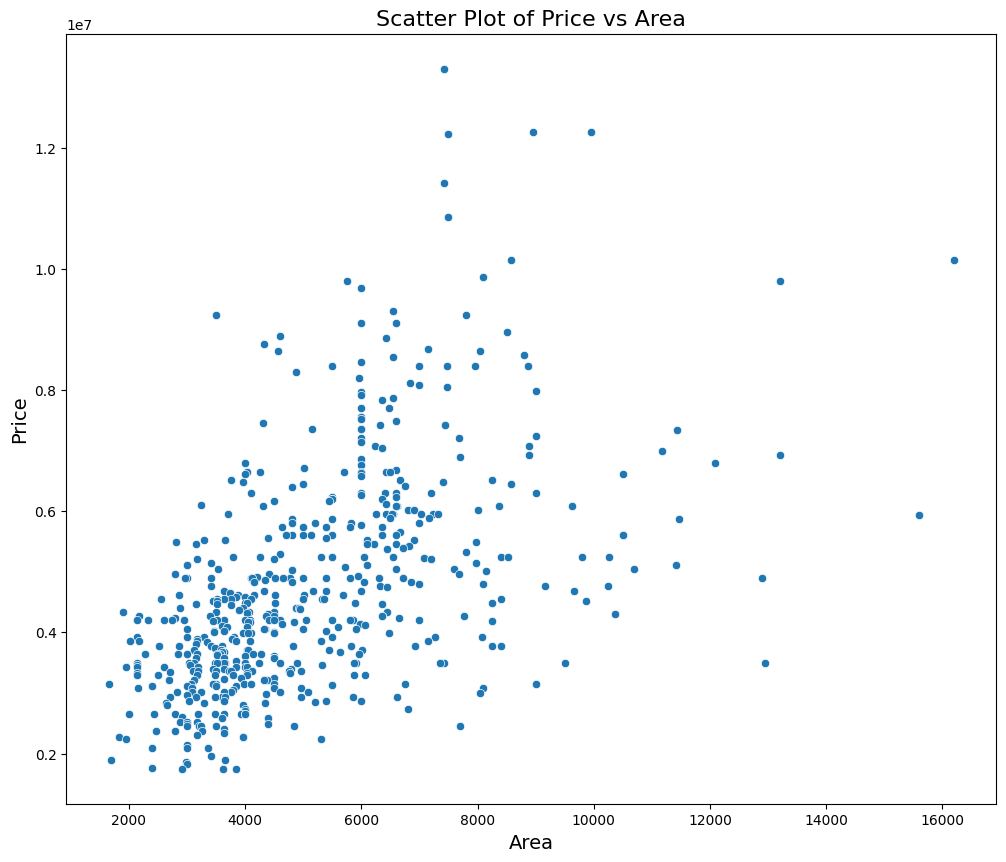

In [6]:
# Відображення діаграми розсіювання
plt.figure(figsize=(12, 10))
sns.scatterplot(x='area', y='price', data=df_main)
plt.title('Scatter Plot of Price vs Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

In [7]:
X = df_main['area'].values.reshape(-1, 1)
y = df_main['price'].values

In [8]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
# Відображення коефіцієнтів моделі
print(f'Intercept from scikit-learn: {model.intercept_}')
print(f'Coefficient from scikit-learn: {model.coef_}')


Intercept from scikit-learn: 2387308.48239643
Coefficient from scikit-learn: [461.97489427]


In [22]:
# Функція гіпотези лінійної регресії у векторному вигляді
def hypothesis(X, theta):
    """

    Параметри:
    X : numpy.ndarray
        Матриця ознак з розмірністю m x (n+1), де m - кількість прикладів,
        n - кількість ознак (не враховуючи ознаку зсуву).
    theta : numpy.ndarray
        Вектор параметрів з розмірністю (n+1) x 1.

    Повертає:
    numpy.ndarray
        Вектор прогнозів з розмірністю m x 1.
    """
    return np.dot(X, theta)


In [23]:
# Функція для обчислення функції втрат у векторному вигляді
def compute_cost(X, y, theta):
    """
    Параметри:
    X : numpy.ndarray
        Матриця ознак з розмірністю m x (n+1), де m - кількість прикладів,
        n - кількість ознак (не враховуючи ознаку зсуву).
    y : numpy.ndarray
        Вектор реальних значень з розмірністю m x 1.
    theta : numpy.ndarray
        Вектор параметрів з розмірністю (n+1) x 1.

    Повертає:
    float
        Значення функції втрат.
    """
    m = len(y)
    predictions = hypothesis(X, theta)
    sqr_errors = (predictions - y) ** 2
    cost = (1 / (2 * m)) * np.sum(sqr_errors)
    return cost


In [24]:
# Один крок градієнтного спуску
def gradient_descent_step(X, y, theta, alpha):
    """

    Параметри:
    X : numpy.ndarray
        Матриця ознак з розмірністю m x (n+1), де m - кількість прикладів,
        n - кількість ознак (не враховуючи ознаку зсуву).
    y : numpy.ndarray
        Вектор реальних значень з розмірністю m x 1.
    theta : numpy.ndarray
        Вектор параметрів з розмірністю (n+1) x 1.
    alpha : float
        Коефіцієнт навчання.

    Повертає:
    numpy.ndarray
        Оновлений вектор параметрів після одного кроку градієнтного спуску.
    """
    m = len(y)
    predictions = hypothesis(X, theta)
    errors = predictions - y
    gradient = (1 / m) * np.dot(X.T, errors)
    theta -= alpha * gradient
    return theta


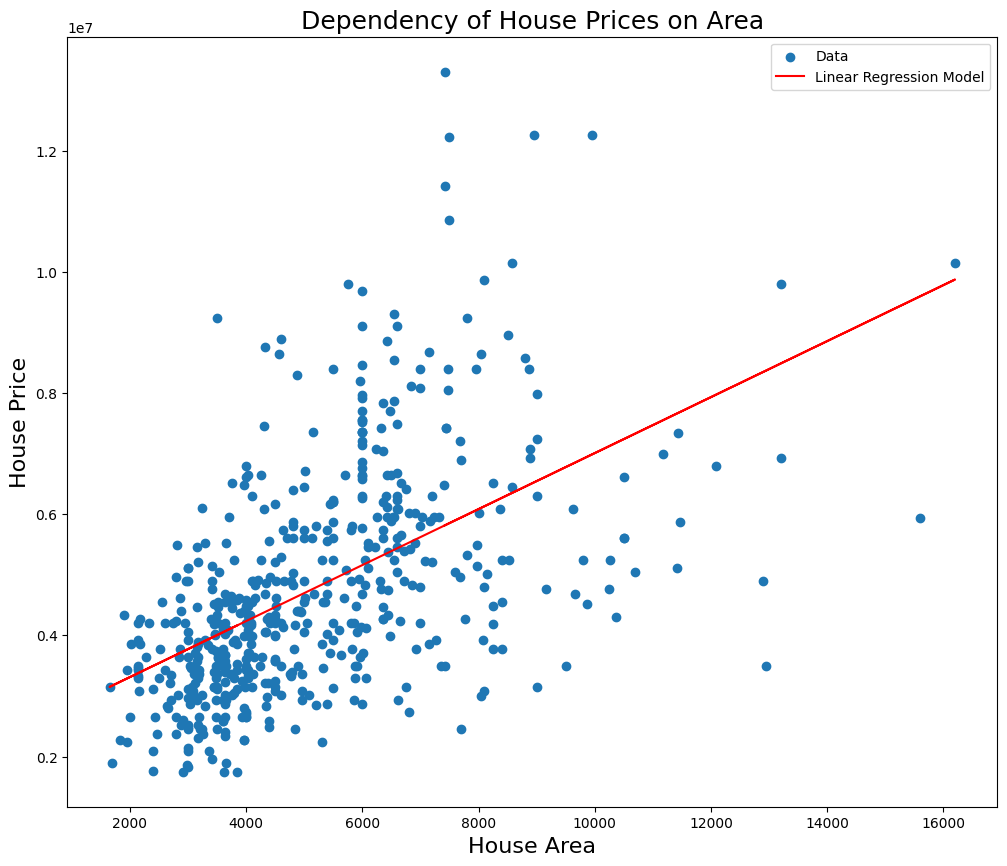

In [16]:
# Відображення лінійної регресії
plt.figure(figsize=(12, 10))
plt.scatter(X, y, label='Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Model')
plt.legend()
plt.xlabel('House Area', fontsize=16)
plt.ylabel('House Price', fontsize=16)
plt.title('Dependency of House Prices on Area', fontsize=18)
plt.show()

In [17]:
# Підготовка даних для багатовимірної лінійної регресії
X_multi = df_main[['area', 'bathrooms', 'bedrooms']]
y_multi = df_main['price']

In [18]:
# Навчання моделі багатовимірної лінійної регресії
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)


LinearRegression()

In [19]:
# Відображення коефіцієнтів моделі багатовимірної лінійної регресії
print(f'Intercept from scikit-learn for multi-variable regression: {model_multi.intercept_}')
print(f'Coefficients from scikit-learn for multi-variable regression: {model_multi.coef_}')


Intercept from scikit-learn for multi-variable regression: -173171.60763263796
Coefficients from scikit-learn for multi-variable regression: [3.78762754e+02 1.38604950e+06 4.06820034e+05]


In [20]:
# Прогнозування ціни будинку за певними характеристиками
house_area = 5000
house_bedrooms = 4
house_bathrooms = 2

predicted_price = model_multi.predict([[house_area, house_bedrooms, house_bathrooms]])
print(f'Predicted price for a house with area {house_area} sq. meters, {house_bedrooms} bedrooms, and {house_bathrooms} bathrooms: ${predicted_price[0]:.2f}')


Predicted price for a house with area 5000 sq. meters, 4 bedrooms, and 2 bathrooms: $8078480.22


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
